Universidad del Valle de Guatemala   <br> 
Facultad de Ingeniería    <br>
Data Science    <br>
Andrés Paiz Caniz <b>191142</b> <br>
René Ventura <b></b> 
</p>

<div align="center"><b>
Laboratorio #4 </h1>
    

Se importan las librerias que pensamos utilizar durante el lab.

Link a codigo de ejemplo:

https://www.geeksforgeeks.org/normalizing-textual-data-with-python/#:~:text=Text%20normalization%20is%20that%20the,before%20operations%20are%20performed%20thereon.

https://stackoverflow.com/questions/73119958/using-regex-to-match-keywords-in-df

https://blog.10xai.co/handling-text-data-with-pandas

https://levelup.gitconnected.com/visualization-in-python-creating-word-cloud-a3e1e73e7adb

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns 
import re 
from sklearn.cluster import AgglomerativeClustering  
import neattext as nt
import matplotlib.pyplot as plt 
import nltk 
from wordcloud import WordCloud 
from nltk import word_tokenize 
from nltk.corpus import stopwords 
from nltk.util import ngrams 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import textdistance
import re
import unicodedata 
import string
from collections import Counter, defaultdict 
import zipfile
import random 
from nltk.probability import ConditionalFreqDist
import matplotlib.pyplot as plt
from operator import itemgetter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
nltk.download(['stopwords', 'punkt', 'names', 'vader_lexicon'] )
stop=set(stopwords.words('english'))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import gensim
import string
import re

from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
nltk.download(['stopwords', 'punkt', 'names', 'vader_lexicon'] )
plt.style.use('ggplot')
stop=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nl

Se carga el archivo train 


Observamos los datos que se cargaron, tienen 5 columnas correspondiendo a:

id: El identificador del tweet 

keyword: una palabra clave del tweet, puede estar en blanco 

location: la ubicación desde donde fue enviado el tweet 

text: El texto del tweet 

target: La etiqueta de clasificación que especifica si el tweet se trata de un desastre real (1) o no (0). 
 

In [3]:
df = pd.read_csv("train lab4.csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Observamos como existen diferentes datos que se deben limpiar y para ellos creamos una funcion que llamar a la hora de limpiar los datos.

Para esta limpieza se utiliza la libreria neattext

In [4]:
def cleand(F):
    for i in range(len(F)):
        F[i] = nt.TextFrame(str(F[i])).remove_emails()
        F[i] = nt.TextFrame(str(F[i])).remove_numbers()
        F[i] = nt.TextFrame(str(F[i])).remove_phone_numbers()
        F[i] = nt.TextFrame(str(F[i])).remove_stopwords(lang = "en")
        F[i] = nt.TextFrame(str(F[i])).remove_btc_address()
        F[i] = nt.TextFrame(str(F[i])).remove_urls()
        F[i] = nt.TextFrame(str(F[i])).remove_stopwords(lang = "es")
        F[i] = nt.TextFrame(str(F[i])).remove_emojis()
        F[i] = nt.TextFrame(str(F[i])).remove_html_tags()
        F[i] = nt.TextFrame(str(F[i])).remove_puncts()
        F[i] = nt.TextFrame(str(F[i])).remove_special_characters()
    
    return F

In [5]:
def Upper(F):
    
    return F.str.upper()

Igualmente creamos funciones para la normalizacion de texto junto con la eliminacion de na que puedan ensuciar la data.

In [6]:
def normalize(text):
    return re.sub('[^a-z0-9]+', ' ', text.lower())

def avantnorm(texts, threshold=0.4): 
    
    normTexts = np.array([normalize(text) for text in texts])
    distancia = 1 - np.array([[textdistance.jaro_winkler(one, another) for one in normTexts] for another in normTexts])
    clustering = AgglomerativeClustering(distance_threshold=threshold,affinity="precomputed", linkage="complete", n_clusters=None).fit(distancia)
    center = dict()
    for clusterId in set(clustering.labels_):
        index = clustering.labels_ == clusterId
        central = distancia[:, index][index].sum(axis=1)
        center[clusterId] = normTexts[index][central.argmin()]
    return [center[i] for i in clustering.labels_]

En el caso de na podemos elegir eliminar los datos o reemplazarlos por algo como "not found".

In [7]:
def naremove(res):
    final = []
    for i in range(len(res)):
        if str(res[i]) == "NAN":
            final.append("Not found")
        else:
            final.append(res[i])
    return final

Querremos limpiar los datos al igual que guardar las palabras importantes para el analisis y creacion del modelo.

Creamos una variable de palabras importantes utilizamos la columna de keyword para esto

In [8]:
keyword = df["keyword"]
keyword = Upper(keyword) 


Procedemos a limpiar la data y a mostrarla

In [9]:
keyword = cleand(keyword)
df["keyword"] = keyword.astype(str)
df.groupby("keyword").count()

,id,location,text,target
keyword,,,,
ABLAZE,36,29,36,36
ACCIDENT,35,28,35,35
AFTERSHOCK,34,25,34,34
AIRPLANEACCIDENT,35,29,35,35
AMBULANCE,38,26,38,38
...,...,...,...,...
WOUNDS,33,27,33,33
WRECK,37,27,37,37
WRECKAGE,39,28,39,39


Normalizamos la data

In [10]:
keyword = df["keyword"]



In [11]:
pc = avantnorm(keyword, 0.6) #esta funcion toma tiempo (10 min avg)

In [12]:
df["keyword"] = pc

In [13]:
df["keyword"] = df["keyword"].str.upper()

Cambiamos Na por "not found"


In [14]:
df["keyword"] = naremove(df["keyword"])


Quitamos los espacios y reemplazamos por "-"

In [15]:
for i in range(len(df["keyword"])):
    word = df["keyword"][i]
    new = word.replace(" ", "-")
    df["keyword"][i] = new

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18812\2408738441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["keyword"][i] = new


In [16]:
df.groupby("keyword").count()

,id,location,text,target
keyword,,,,
ARSONIST,292,161,292,292
BOMBING,549,367,549,549
COLLAPSE,256,197,256,256
CRASHED,381,247,381,381
DEATH,451,314,451,451
DEMOLISHED,439,297,439,439
DROWN,245,168,245,245
ELECTROCUTE,243,155,243,243
EMERGENCY,281,194,281,281


Se puede observar el recuento de las palabras clave en la data.

Se hace el mismo proceso para las columnas restantes.

Limpiamos text.

In [17]:
text = df["text"]


Limpiamos text y convertimos a mayusculas

In [18]:
text = Upper(text)
text = cleand(text)
df["text"] = text.astype(str)


No se hace el groupby count para text ya que es poco probable que tweets sean exactamente iguales.

Limpiamos location

In [19]:
location = df["location"]

In [20]:
location = Upper(location)
location = cleand(location)
df["location"] = location.astype(str)

No realizamos el groupby count de location ya que no es normalizado estos datos.

Se realiza el mismo proceso que para keyword.

In [21]:
location = df["location"]
loc = avantnorm(location, 0.6) #(igual dura como 10 min)
df["location"] = loc
df["location"] = df["location"].str.upper()

Na remove

In [22]:
df["location"] = naremove(df["location"])


In [23]:
for i in range(len(df["location"])):
    word = df["location"][i]
    new = word.replace(" ", "-")
    df["location"][i] = new

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18812\2862913598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["location"][i] = new


Ahora si realizamos el groupby count

In [24]:
df.groupby("location").count()

,id,keyword,text,target
location,,,,
,273,273,273,273
-,35,35,35,35
-NY,12,12,12,12
ALABAMA,26,26,26,26
ALEXANDRIA,29,29,29,29
...,...,...,...,...
WATERLOO,11,11,11,11
WEST-COAST,18,18,18,18
WINSTONSALEM-NC,31,31,31,31


Podemos observar la cantidad de tweets por localizacion de los mismos.

Analisis Exploratorio


In [26]:
keyword2 = " ".join(review for review in df.keyword.astype(str))

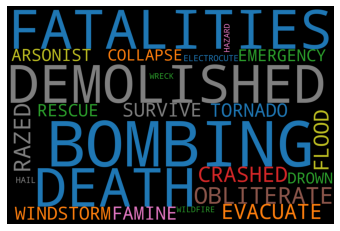

In [28]:


wordcloud = WordCloud(width = 1500, 
                      height = 1000, 
                      random_state = 42, 
                      background_color = 'black', 
                      colormap = 'tab10', 
                      collocations = False, 
                      stopwords = STOPWORDS).generate(keyword2)

plt.axis("off")
plt.imshow(wordcloud) 


In [29]:
display(WordCloud().process_text(keyword2))

{'ARSONIST ARSONIST': 287,
 'RAZED RAZED': 379,
 'FAMINE FAMINE': 325,
 'EMERGENCY EMERGENCY': 276,
 'ELECTROCUTE ELECTROCUTE': 238,
 'DEMOLISHED DEMOLISHED': 430,
 'DEMOLISHED FAMINE': 1,
 'FATALITIES FATALITIES': 455,
 'FATALITIES DEMOLISHED': 1,
 'DEMOLISHED FATALITIES': 1,
 'FATALITIES OBLITERATE': 1,
 'OBLITERATE OBLITERATE': 388,
 'OBLITERATE RAZED': 1,
 'RAZED BOMBING': 1,
 'BOMBING BOMBING': 545,
 'HAIL HAIL': 233,
 'HAZARD HAZARD': 209,
 'FLOOD FLOOD': 354,
 'FLOOD BOMBING': 1,
 'BOMBING OBLITERATE': 1,
 'OBLITERATE BOMBING': 1,
 'WILDFIRE WILDFIRE': 193,
 'CRASHED CRASHED': 377,
 'CRASHED FATALITIES': 1,
 'COLLAPSE COLLAPSE': 254,
 'FLOOD RAZED': 1,
 'RAZED DEATH': 1,
 'DEATH DEATH': 448,
 'RESCUE RESCUE': 289,
 'DEMOLISHED DEATH': 1,
 'DEATH TORNADO': 1,
 'TORNADO TORNADO': 339,
 'TORNADO DEATH': 1,
 'DEATH DEMOLISHED': 1,
 'DROWN DROWN': 242,
 'WINDSTORM WINDSTORM': 321,
 'WINDSTORM FATALITIES': 1,
 'EVACUATE EVACUATE': 357,
 'FATALITIES FLOOD': 2,
 'FLOOD OBLITERATE': 1,
 

Se puede observar cuantas veces existen las keywords en la data.

In [35]:
display(WordCloud().process_text(keyword2))

{'ARSONIST ARSONIST': 287,
 'RAZED RAZED': 379,
 'FAMINE FAMINE': 325,
 'EMERGENCY EMERGENCY': 276,
 'ELECTROCUTE ELECTROCUTE': 238,
 'DEMOLISHED DEMOLISHED': 430,
 'DEMOLISHED FAMINE': 1,
 'FATALITIES FATALITIES': 455,
 'FATALITIES DEMOLISHED': 1,
 'DEMOLISHED FATALITIES': 1,
 'FATALITIES OBLITERATE': 1,
 'OBLITERATE OBLITERATE': 388,
 'OBLITERATE RAZED': 1,
 'RAZED BOMBING': 1,
 'BOMBING BOMBING': 545,
 'HAIL HAIL': 233,
 'HAZARD HAZARD': 209,
 'FLOOD FLOOD': 354,
 'FLOOD BOMBING': 1,
 'BOMBING OBLITERATE': 1,
 'OBLITERATE BOMBING': 1,
 'WILDFIRE WILDFIRE': 193,
 'CRASHED CRASHED': 377,
 'CRASHED FATALITIES': 1,
 'COLLAPSE COLLAPSE': 254,
 'FLOOD RAZED': 1,
 'RAZED DEATH': 1,
 'DEATH DEATH': 448,
 'RESCUE RESCUE': 289,
 'DEMOLISHED DEATH': 1,
 'DEATH TORNADO': 1,
 'TORNADO TORNADO': 339,
 'TORNADO DEATH': 1,
 'DEATH DEMOLISHED': 1,
 'DROWN DROWN': 242,
 'WINDSTORM WINDSTORM': 321,
 'WINDSTORM FATALITIES': 1,
 'EVACUATE EVACUATE': 357,
 'FATALITIES FLOOD': 2,
 'FLOOD OBLITERATE': 1,
 

In [36]:
fr = display(WordCloud().process_text(keyword2))

{'ARSONIST ARSONIST': 287,
 'RAZED RAZED': 379,
 'FAMINE FAMINE': 325,
 'EMERGENCY EMERGENCY': 276,
 'ELECTROCUTE ELECTROCUTE': 238,
 'DEMOLISHED DEMOLISHED': 430,
 'DEMOLISHED FAMINE': 1,
 'FATALITIES FATALITIES': 455,
 'FATALITIES DEMOLISHED': 1,
 'DEMOLISHED FATALITIES': 1,
 'FATALITIES OBLITERATE': 1,
 'OBLITERATE OBLITERATE': 388,
 'OBLITERATE RAZED': 1,
 'RAZED BOMBING': 1,
 'BOMBING BOMBING': 545,
 'HAIL HAIL': 233,
 'HAZARD HAZARD': 209,
 'FLOOD FLOOD': 354,
 'FLOOD BOMBING': 1,
 'BOMBING OBLITERATE': 1,
 'OBLITERATE BOMBING': 1,
 'WILDFIRE WILDFIRE': 193,
 'CRASHED CRASHED': 377,
 'CRASHED FATALITIES': 1,
 'COLLAPSE COLLAPSE': 254,
 'FLOOD RAZED': 1,
 'RAZED DEATH': 1,
 'DEATH DEATH': 448,
 'RESCUE RESCUE': 289,
 'DEMOLISHED DEATH': 1,
 'DEATH TORNADO': 1,
 'TORNADO TORNADO': 339,
 'TORNADO DEATH': 1,
 'DEATH DEMOLISHED': 1,
 'DROWN DROWN': 242,
 'WINDSTORM WINDSTORM': 321,
 'WINDSTORM FATALITIES': 1,
 'EVACUATE EVACUATE': 357,
 'FATALITIES FLOOD': 2,
 'FLOOD OBLITERATE': 1,
 

Usamos un counter ya que si se trata de guardar el display de wordcloud devuelve un None por lo cual es dificil utilizarlo para el analisis.

In [39]:
fr = Counter(keyword2.split())
fr



Counter({'ARSONIST': 292,
         'RAZED': 385,
         'FAMINE': 332,
         'EMERGENCY': 281,
         'ELECTROCUTE': 243,
         'DEMOLISHED': 439,
         'FATALITIES': 464,
         'OBLITERATE': 395,
         'BOMBING': 549,
         'HAIL': 240,
         'HAZARD': 213,
         'FLOOD': 359,
         'WILDFIRE': 198,
         'CRASHED': 381,
         'COLLAPSE': 256,
         'DEATH': 451,
         'RESCUE': 294,
         'TORNADO': 344,
         'DROWN': 245,
         'WINDSTORM': 327,
         'EVACUATE': 363,
         'WRECK': 215,
         'SURVIVE': 347})

Histograma de las top 5 keywords

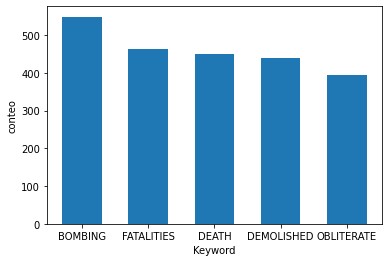

In [59]:
N = 5
res = dict(sorted(fr.items(), key = itemgetter(1), reverse = True)[:N])

fig, ax = plt.subplots()
plt.bar(res.keys(), res.values(), width = 0.6)

ax.set_ylabel('conteo')
ax.set_xlabel('Keyword')
plt.show()

Hacemos lo mismo para la variable de location


In [61]:
location2 = " ".join(review for review in df.location.astype(str))

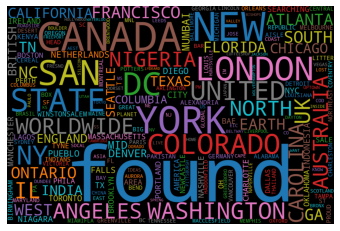

In [64]:
wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      random_state = 42, 
                      background_color = 'black', 
                      colormap = 'tab10', 
                      collocations = False, 
                      stopwords = STOPWORDS).generate(location2)

plt.axis("off")
plt.imshow(wordcloud) 

Aqui "found" son los na pero "not found" aunque se trastorno.

In [65]:
frloc = display(WordCloud().process_text(location2))

{'found': 2538,
 'BIRMINGHAM': 29,
 'DESERT': 22,
 'AMERICA': 35,
 'PHILA': 33,
 'LONDON': 120,
 'NY': 9,
 'WORLDWIDE': 83,
 'ALABAMA': 26,
 'MIAMIFLA': 21,
 'NIGERIA': 74,
 'INDIA': 52,
 'ASIA': 18,
 'CANADA': 111,
 'SOUTH': 70,
 'PAULO': 14,
 'HOLLYWOOD': 11,
 'ANGELES': 78,
 'TWITTER': 6,
 'UK': 51,
 'COLORADO': 16,
 'AUSTRALIA': 47,
 'DETROIT': 25,
 'ARLINGTON': 21,
 'LOUISIANA': 19,
 'MANCHESTER': 41,
 'MNL': 22,
 'GLOBAL': 19,
 'GLOUCESTER': 9,
 'INDONESIA': 45,
 'IRELAND': 36,
 'KNOW': 14,
 'TEXAS': 28,
 'EARTH': 39,
 'MARYLAND': 22,
 'DHAKA': 9,
 'MUMBAI': 46,
 'GERMANY': 27,
 'SEATTLE': 49,
 'NYC': 38,
 'TORONTO': 39,
 'JACKSON': 11,
 'CAMBRIDGE': 10,
 'FLORIDA': 34,
 'HEAD': 26,
 'PITTSBURGH': 13,
 'RP': 5,
 'BOSTON': 33,
 'NETHERLANDS': 46,
 'PA': 27,
 'CALIFORNIA': 56,
 'SYDNEY': 22,
 'PORTLAND': 37,
 'LAHORE': 7,
 'HOME': 13,
 'BOURNEMOUTH': 9,
 'MASSACHUSETTS': 35,
 'TOKYO': 12,
 'MACCLESFIELD': 20,
 'KENT': 9,
 'COFFEESHOP': 11,
 'PAKISTAN': 26,
 'MICHIGAN': 26,
 'LIVERP

In [67]:
frloc = Counter(location2.split())
frloc

Counter({'Not-found': 2544,
         'BIRMINGHAM': 29,
         'DESERT': 22,
         'AMERICA': 35,
         'PHILA': 33,
         'LONDON': 120,
         'EAST-AURORA-NY': 19,
         'WORLDWIDE': 83,
         'ALABAMA': 26,
         'LIVE-MS': 13,
         'MIAMIFLA': 21,
         'GREENSBORO-NORTH-CAROLINA': 17,
         'NIGERIA': 74,
         'GREENVILLE-SC': 22,
         'INDIA': 52,
         'ATLANTA-GA': 66,
         'ASIA': 18,
         'CANADA': 111,
         'SOUTH': 70,
         'SO-PAULO': 14,
         'HOLLYWOOD': 11,
         'ANGELES': 78,
         'NIAGARA-FALLS-ONTARIO': 41,
         'TWITTER': 6,
         'CHARLESTON-IL': 23,
         'SAN-FRANCISCO-': 72,
         'NASHVILLE-TN': 37,
         'SAN-DIEGO': 44,
         'UK': 51,
         'ST-LOUIS': 26,
         'PUEBLO-COLORADO': 45,
         'AUSTRALIA': 47,
         'NORTH-CAROLINA': 58,
         'BROOKLYN-NY': 35,
         'DETROIT': 25,
         'ARLINGTON': 21,
         'NEW-YORK': 160,
         'LOUISIANA':

Aqui podemos ver como not found es ese found en el wordcloud

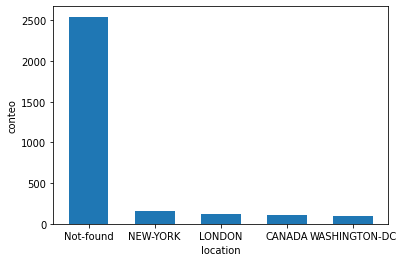

In [68]:
N = 5
res2 = dict(sorted(frloc.items(), key = itemgetter(1), reverse = True)[:N])

fig, ax = plt.subplots()
plt.bar(res2.keys(), res2.values(), width = 0.6)

ax.set_ylabel('conteo')
ax.set_xlabel('location')
plt.show()

De nuevo hacemos los mismos pasos para text.

In [69]:
text2 = " ".join(review for review in df.text.astype(str))


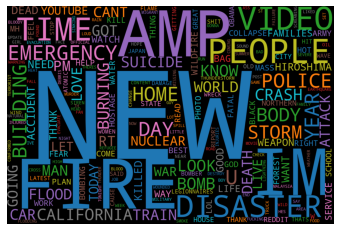

In [70]:
wordcloud = WordCloud(width = 1500, 
                      height = 1000, 
                      random_state = 42, 
                      background_color = 'black', 
                      colormap = 'tab10', 
                      collocations = False, 
                      stopwords = STOPWORDS).generate(text2)

plt.axis("off")
plt.imshow(wordcloud) 

In [71]:
frtxt = display(WordCloud().process_text(text2))

{'DEEDS': 2,
 'REASON': 27,
 'EARTHQUAKE': 26,
 'ALLAH': 6,
 'FORGIVE': 2,
 'FIRE': 180,
 'NEAR': 48,
 'RONGE': 1,
 'SASK': 1,
 'CANADA': 13,
 'RESIDENTS': 6,
 'ASKED': 9,
 'SHELTER': 6,
 'PLACE': 31,
 'NOTIFIED': 1,
 'EVACUATION': 31,
 'EXPECTED': 7,
 'PEOPLE': 161,
 'RECEIVE': 3,
 'CALIFORNIA': 16,
 'GOT': 112,
 'SENT': 13,
 'PHOTO': 51,
 'RUBY': 1,
 'ALASKA': 5,
 'SMOKE': 49,
 'SCHOOL': 28,
 'ROCKYFIRE': 4,
 'UPDATE': 38,
 'HWY': 10,
 'CLOSED': 20,
 'LAKE': 12,
 'COUNTY': 17,
 'CAFIRE': 2,
 'FLOOD': 62,
 'DISASTER': 20,
 'HEAVY': 6,
 'RAIN': 43,
 'FLASH': 2,
 'FLOODING': 46,
 'MANITOU': 1,
 'COLORADO': 5,
 'IM': 244,
 'HILL': 12,
 'THERES': 45,
 'EMERGENCY': 85,
 'HAPPENING': 13,
 'BUILDING': 50,
 'STREET': 26,
 'AFRAID': 5,
 'TORNADO': 24,
 'COMING': 34,
 'AREA': 41,
 'DIED': 5,
 'HEAT': 10,
 'FAR': 18,
 'HAHA': 20,
 'SOUTH': 20,
 'TAMPA': 4,
 'GETTING': 56,
 'FLOODED': 4,
 'HAH': 3,
 'WAIT': 20,
 'SECOND': 28,
 'LIVE': 48,
 'GONNA': 32,
 'FVCK': 1,
 'RAINING': 4,
 'FLORIDA': 9,
 '

In [72]:
frtxt = Counter(text2.split())
frtxt

Counter({'DEEDS': 2,
         'REASON': 20,
         'EARTHQUAKE': 50,
         'ALLAH': 9,
         'FORGIVE': 2,
         'FOREST': 65,
         'FIRE': 252,
         'NEAR': 54,
         'RONGE': 1,
         'SASK': 1,
         'CANADA': 11,
         'RESIDENTS': 8,
         'ASKED': 9,
         'SHELTER': 6,
         'PLACE': 26,
         'NOTIFIED': 1,
         'OFFICERS': 8,
         'EVACUATION': 50,
         'ORDERS': 11,
         'EXPECTED': 15,
         'PEOPLE': 196,
         'RECEIVE': 2,
         'WILDFIRES': 11,
         'CALIFORNIA': 117,
         'GOT': 112,
         'SENT': 13,
         'PHOTO': 41,
         'RUBY': 1,
         'ALASKA': 6,
         'SMOKE': 48,
         'POURS': 1,
         'SCHOOL': 66,
         'ROCKYFIRE': 4,
         'UPDATE': 37,
         'HWY': 10,
         'CLOSED': 20,
         'DIRECTIONS': 1,
         'LAKE': 14,
         'COUNTY': 38,
         'CAFIRE': 2,
         'FLOOD': 56,
         'DISASTER': 153,
         'HEAVY': 20,
         'RAIN'

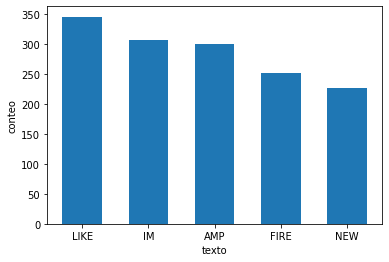

In [73]:
N = 5
res3 = dict(sorted(frtxt.items(), key = itemgetter(1), reverse = True)[:N])

fig, ax = plt.subplots()
plt.bar(res3.keys(), res3.values(), width = 0.6)

ax.set_ylabel('conteo')
ax.set_xlabel('texto')
plt.show()

Determinar las palabras positivas, negativas o neutras 

Teniendo en cuenta la cantidad de palabras positivas y negativas del tweet determine qué tan 
positivo, negativo o neutral es el mismo. 

Se utilizo la libreria nltk para determinar los tweets positivos, negativos o neutros.

In [100]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [102]:
sid = SentimentIntensityAnalyzer()

In [103]:
def setPolarity(score):
    if score < -0.33:
        return 'negative'
    elif score > 0.33:
        return 'positive'
    else:
        return 'neutral'

In [104]:
def getScoreText(text):
    scoreObject = sid.polarity_scores(text)
    score = scoreObject['compound']
    return score

¿Cuáles son los 10 tweets más negativos?¿En qué categoría están? 



In [110]:
df['score'] = df['text'].apply(lambda x : getScoreText(x))
df['polaridad'] = df['text'].apply(lambda x : setPolarity(getScoreText(x)))

In [111]:
df

,id,keyword,location,text,target,score,polaridad
0,1,ARSONIST,Not-found,DEEDS REASON EARTHQUAKE ALLAH FORGIVE,1,0.2732,neutral
1,4,ARSONIST,Not-found,FOREST FIRE NEAR RONGE SASK CANADA,1,-0.3400,negative
2,5,ARSONIST,Not-found,RESIDENTS ASKED SHELTER PLACE NOTIFIED OFFICER...,1,0.0000,neutral
3,6,ARSONIST,Not-found,PEOPLE RECEIVE WILDFIRES EVACUATION ORDERS CA...,1,0.0000,neutral
4,7,ARSONIST,Not-found,GOT SENT PHOTO RUBY ALASKA SMOKE WILDFIRES POU...,1,0.0000,neutral
...,...,...,...,...,...,...,...
7608,10869,ARSONIST,Not-found,GIANT CRANES HOLDING BRIDGE COLLAPSE NEARBY HOMES,1,-0.4939,negative
7609,10870,ARSONIST,Not-found,ARIAAHRARY THETAWNIEST CONTROL WILD FIRES CALI...,1,-0.5423,negative
7610,10871,ARSONIST,Not-found,M UTCKM VOLCANO HAWAII,1,0.0000,neutral
7611,10872,ARSONIST,Not-found,POLICE INVESTIGATING EBIKE COLLIDED CAR LITTLE...,1,-0.7650,negative


In [112]:
df.sort_values(by=["score"]).head(10)

,id,keyword,location,text,target,score,polaridad
7472,10689,WRECK,Not-found,WRECK WRECK WRECK WRECK WRECK WRECK WRECK WREC...,0,-0.9879,negative
6414,9172,SURVIVE,Not-found,ABUBARAA SUICIDE BOMBER TARGETS SAUDI MOSQUE D...,1,-0.9686,negative
6411,9166,SURVIVE,Not-found,SUICIDE BOMBER KILLS SAUDI SECURITY SITE MOSQU...,1,-0.9623,negative
6393,9137,SURVIVE,WORLDWIDE,TH DAY JUL NIGERIA SUICIDE BOMB ATTACKS KILL...,1,-0.9595,negative
6407,9159,SURVIVE,WORLDWIDE,KILLED SARABIA MOSQUE SUICIDE BOMBING SUICIDE ...,1,-0.9552,negative
472,682,FATALITIES,PORTLAND,ILLEGAL ALIEN RELEASED OBAMADHS TIMES CHARGED ...,1,-0.9538,negative
1540,2225,HAIL,VEGAS-NV,BOMB CRASH LOOT RIOT EMERGENCY PIPE BOMB NUCLE...,1,-0.9524,negative
6930,9940,RESCUE,Not-found,CSPAN PREZ MR PRESIDENT BIGGEST TERRORIST TROU...,1,-0.9493,negative
2932,4213,DROWN,BEND-OREGON,LAKE SEES DEAD FISH ME POOR LITTLE GUY WONDER ...,0,-0.9477,negative
6438,9211,SURVIVE,Not-found,REMEMBERING REBECCA ROGA PHILIPPINES MURDERED ...,1,-0.9451,negative


Los top 10 negativos pertenecen a las categorias: Wreck, survive, fatalities, hail, rescue y drown.

¿Cuáles son los 10 tweets más positivos? ¿En qué categoría están? 

In [113]:
df.sort_values(by=["score"], ascending=False).head(10)

,id,keyword,location,text,target,score,polaridad
6992,10028,FATALITIES,Not-found,CHECK WANT TWISTER TICKETS VIP EXPERIENCE SHAN...,0,0.9682,positive
3163,4541,EMERGENCY,DENVER-COLORADO,BATFANUK ENJOYED TODAY GREAT FUN EMERGENCY NON...,0,0.9423,positive
3382,4844,EVACUATE,DENVER-COLORADO,BATFANUK ENJOYED TODAY GREAT FUN EMERGENCY NON...,0,0.9423,positive
6292,8989,HAZARD,Not-found,TODAYS STORM PASS LET TOMORROWS LIGHT GREET KI...,1,0.9403,positive
2238,3198,RESCUE,Not-found,MEDITATIONBYMSG PPL GOT METHOD MEDITATION UP A...,0,0.9287,positive
6295,8994,HAZARD,Not-found,FREE EBAY SNIPING RT LUMBAR EXTENDER STRETCHER...,0,0.9260,positive
6560,9386,SURVIVE,PUEBLO-COLORADO,DUCHOVBUTT STARBUCKSCULLY MADMAKNY DAVIDDUCHOV...,0,0.9217,positive
1856,2668,CRASHED,SAN-DIEGO,LOVE LOVE LOVE REMEMBER CRUSH,0,0.9186,positive
1909,2744,CRASHED,BROOKLYN-NY,DISILLUSIONED LEAD CHARACTER CHECK HAPPY LUCKY...,0,0.9136,positive
5033,7176,WILDFIRE,LONDON,IMPRESSIONS GLAD HAT MAN LEAVING LIEU INTEREST...,0,0.9100,positive


Los 10 tweets más positivos pertenecen a las categorias: Fatalities, Emergency, evacuate, hazard, rescue, survive, crashed, wildfire.

¿Son los tweets de la categoría que indica que habla de un desastre real más negativos que 
los de la otra categoría? 

Podemos observar que los tweets positivos tienden a pertenecer a la categoria de desastres reales mientras que los negativos a los no reales.

Cree  una  variable  que  contenga  la  “negatividad”  de  cada  tweet.  Inclúyala  en  el  conjunto  de 
datos y entrene nuevamente el modelo de clasificación de la hoja pasada. ¿La inclusión de esta 
variable mejoró los resultados del modelo de clasificación? 

In [147]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [148]:
corpus=create_corpus(df)

100%|██████████| 6542/6542 [00:00<00:00, 13551.32it/s]


In [151]:
embedding_dict={}
with open('./glove.6B.100d.txt','r', encoding='utf-8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [152]:
MAX_LEN = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences = tokenizer_obj.texts_to_sequences(corpus)

tweet_pad = pad_sequences(sequences, maxlen=MAX_LEN, truncating='post', padding='post')

In [153]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 15074


In [154]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 15074/15074 [00:00<00:00, 889039.58it/s]


In [155]:
from cProfile import run


model=Sequential()
embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix), input_length=MAX_LEN,trainable=False)
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
optimzer=Adam(learning_rate=1e-5)
model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'], run_eagerly=True)

In [156]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1507500   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,549,805
Trainable params: 42,305
Non-trainable params: 1,507,500
_________________________________________________________________


In [157]:
train=tweet_pad[:df.shape[0]]
test=tweet_pad[df.shape[0]:]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(train, df['target'].values, test_size=0.15)
X_train.shape, X_test.shape

((5560, 50), (982, 50))

In [161]:
history = model.fit(X_train, y_train, batch_size=4, epochs=5, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
1390/1390 - 437s - loss: 0.6803 - accuracy: 0.5897 - val_loss: 0.6209 - val_accuracy: 0.7057 - 437s/epoch - 315ms/step
Epoch 2/5
1390/1390 - 521s - loss: 0.6136 - accuracy: 0.7101 - val_loss: 0.5358 - val_accuracy: 0.7831 - 521s/epoch - 375ms/step
Epoch 3/5
1390/1390 - 473s - loss: 0.5826 - accuracy: 0.7263 - val_loss: 0.5162 - val_accuracy: 0.7862 - 473s/epoch - 340ms/step
Epoch 4/5
1390/1390 - 486s - loss: 0.5736 - accuracy: 0.7216 - val_loss: 0.5110 - val_accuracy: 0.7739 - 486s/epoch - 350ms/step
Epoch 5/5
1390/1390 - 485s - loss: 0.5608 - accuracy: 0.7304 - val_loss: 0.5037 - val_accuracy: 0.7811 - 485s/epoch - 349ms/step


In [ ]:
sample_sub = pd.read_csv('./predictions.csv')

In [ ]:
y_pre=model.predict(test)
y_pre=np.round(y_pre).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pre})
sub.to_csv('submission.csv',index=False)